## Data Cleaning ##

In [1]:
import pandas as pd 
import numpy as np 

# preprocessing for data normalization
from sklearn import preprocessing

In [2]:
# importing sample outputs from predicto() in NN.ipynb

samples = ['6ScgNyiMGRJcuQl6fHE32t',
           '4hpQCCUn1D2KJ0hRIvviNz',
           '1oXRum87ShmIRW8GgETPjd',
           '12pBDYcRz2KJXTnhFste8v',
           '7cGpisHH8TCwcPI1Pxd0IM',
           '3Kb4dMQn8cAXthan2osI0l',
           '2ggqfj97qyiORmXoVFzP5j',
           '2ggqfj97qyiORmXoVFzP5j',
           '3Mt3L75pk83KGc0c4VJzLM',
           '3oDk8PFjkiqwEn1m03pnkm',
           '27fUxjCxoOG7u2kxKAjCJA',
           '63L3A0z2A5DRix83DnHCDX',
           '7hlljw8YiOutMUrFekNIA0',
           '3uZIfWx5ridUBQevmgHDUt']

In [3]:
# path of our song dataset
PATH = '../data/SpotifyFeatures.csv'

df = pd.read_csv(PATH)
df.head()

,Unnamed: 0,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.910,0.000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.737,0.000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,0.131,0.000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,152427,0.326,0.000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,82625,0.225,0.123,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390


In [4]:
# wanna keep Danceability, Instrumentalness, Loudness, Speechiness, Valence
# drop all other columns (maybe preserve artist name/track name etc.)

cols = [
    'Unnamed: 0', 'genre', 'popularity', 'duration_ms',
    'key', 'mode', 'tempo', 'time_signature', 'acousticness',
    'energy', 'liveness'
]

df = df.drop(cols, axis=1)

In [5]:
df.head()

,artist_name,track_name,track_id,danceability,instrumentalness,loudness,speechiness,valence
0,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0.389,0.000,-1.828,0.0525,0.814
1,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,0.590,0.000,-5.559,0.0868,0.816
2,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,0.663,0.000,-13.879,0.0362,0.368
3,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0.240,0.000,-12.178,0.0395,0.227
4,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,0.331,0.123,-21.150,0.0456,0.390


## Data Normalization ##

In [6]:
# our aim here is to make all the data normalized (between 0 and 1)

# let's make a dataframe with just the data to be normalized
slice_df = df.loc[:, 'danceability':'valence']
slice_df.head()

,danceability,instrumentalness,loudness,speechiness,valence
0,0.389,0.000,-1.828,0.0525,0.814
1,0.590,0.000,-5.559,0.0868,0.816
2,0.663,0.000,-13.879,0.0362,0.368
3,0.240,0.000,-12.178,0.0395,0.227
4,0.331,0.123,-21.150,0.0456,0.390


In [7]:
import pandas as pd
from sklearn import preprocessing

x = slice_df.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
norm_df = pd.DataFrame(x_scaled)

In [8]:
norm_df.head()

,0,1,2,3,4
0,0.356292,0.000000,0.900856,0.032070,0.814
1,0.571934,0.000000,0.834469,0.068374,0.816
2,0.650252,0.000000,0.686429,0.014818,0.368
3,0.196438,0.000000,0.716695,0.018311,0.227
4,0.294067,0.123123,0.557054,0.024767,0.390


In [9]:
# columns got renamed, let's fix that
# Danceability, Instrumentalness, Loudness, Speechiness, Valence
norm_df.columns = ['danceability', 'instrumentalness', 'loudness', 'speechiness', 'valence']
norm_df.head()

,danceability,instrumentalness,loudness,speechiness,valence
0,0.356292,0.000000,0.900856,0.032070,0.814
1,0.571934,0.000000,0.834469,0.068374,0.816
2,0.650252,0.000000,0.686429,0.014818,0.368
3,0.196438,0.000000,0.716695,0.018311,0.227
4,0.294067,0.123123,0.557054,0.024767,0.390


In [10]:
# speechiness looks really low, let's see if it's actually between 0 and 1

norm_df['speechiness'].describe() 

# guess so... but it's definitely skewed. oh well.

count    232725.000000
mean          0.104324
std           0.196357
min           0.000000
25%           0.015347
50%           0.029530
75%           0.087638
max           1.000000
Name: speechiness, dtype: float64

In [11]:
df = df.loc[:, 'artist_name':'track_id']
df = df.join(norm_df)

In [12]:
df.head()

,artist_name,track_name,track_id,danceability,instrumentalness,loudness,speechiness,valence
0,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0.356292,0.000000,0.900856,0.032070,0.814
1,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,0.571934,0.000000,0.834469,0.068374,0.816
2,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,0.650252,0.000000,0.686429,0.014818,0.368
3,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0.196438,0.000000,0.716695,0.018311,0.227
4,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,0.294067,0.123123,0.557054,0.024767,0.390


## Radar Plot Experimentation ##

In [21]:
import plotly.graph_objects as go
import numpy as np

def make_graph(track_id_input):

    aa = np.array([track_id_input['danceability']]) # danceability
    bb = np.array([0.000000]) # instrumentalness
    cc = np.array([0.900856]) # loudness
    dd = np.array([0.814000]) # valence
    ee = np.array([0.356292]) # danceability again (to "close" graph)

    categories = ['danceability', 'instrumentalness', 'loudness', 'valence']

    fig = go.Figure()

    fig.add_trace(go.Scatterpolar(
          r=[aa[0], bb[0], cc[0], dd[0], ee[0]],
          theta=categories,
          fill='toself'
    ))

    fig.update_layout(
      polar=dict(
        radialaxis=dict(
          visible=True,
          range=[0, 1]
        )),
          showlegend=False
    )

    fig.show()

## Audio Features: ##

In [10]:
# Let's start with a spread of each feature over the entire dataset
# We're going to consider this a spread of all music as whole? idk

df.head()

,artist_name,track_name,track_id,danceability,instrumentalness,loudness,speechiness,valence
0,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0.389,0.000,-1.828,0.0525,0.814
1,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,0.590,0.000,-5.559,0.0868,0.816
2,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,0.663,0.000,-13.879,0.0362,0.368
3,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0.240,0.000,-12.178,0.0395,0.227
4,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,0.331,0.123,-21.150,0.0456,0.390


<AxesSubplot:xlabel='loudness'>

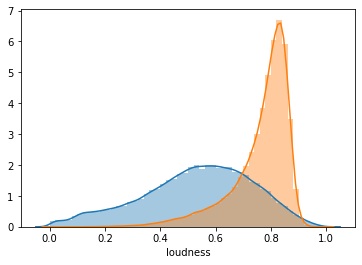

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt 

sns.distplot(df['danceability'])
# sns.distplot(df['instrumentalness'])
sns.distplot(df['loudness'])
# sns.distplot(df['speechiness'])
# sns.distplot(df['valence'])

In [ ]:
conn = sqlite3.connect('spotitry_songs.db')
    curs = conn.cursor()
    sql = "INSERT INTO spotitry_songs (id, name, energy, liveness, danceability, instrumentalness, loudness, speechiness, valence, tempo) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s)"
    val = (song_id, name, energy, liveness, danceability, instrumentalness, loudness, speechiness, valence, tempo)
    curs.execute(sql % val)